In [12]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


1. from sklearn.datasets import fetch_lfw_people
- This imports the function fetch_lfw_people from scikit-learn's datasets module. This function allows you to load the labeled faces in the wild (LFW) dataset, which is a popular dataset in computer vision used for face recognition tasks.
2. faces = fetch_lfw_people(min_faces_per_person=60)
- This line calls the fetch_lfw_people function, fetching the dataset. The min_faces_per_person=60 parameter ensures that only people with at least 60 images are included in the dataset.
3. When the code is running, it will fetch the LFW dataset, print the names of the people in the dataset, the number of unique people, and the shape of the image data. This is often used as a first step in understanding the structure and content of a new dataset before further analysis or processing is done.

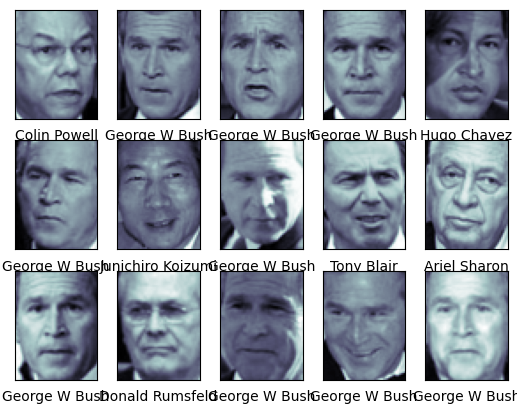

In [4]:
# contoh wajah yang digunakan

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

1. fig, ax = plt.subplots(3, 5)
- This line creates a 3x5 grid of subplots, providing space to display 15 face images (3 rows and 5 columns).
2. When the code is running, it will create a grid of 15 subplots, each displaying a grayscale face image with the person's name as the x-axis label.

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In this code, we are creating a machine learning pipeline for face recognition using Principal Component Analysis (PCA) for dimensionality reduction and a Support Vector Machine (SVM) classifier with a radial basis function (RBF) kernel. This combination often works well for tasks like face recognition where the number of features (pixels) is high, and the goal is to capture the essential patterns for classification.

In [6]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In this code, we are using scikit-learn's train_test_split function to split our face dataset into training and testing sets. After this code is executed, we will have four sets of data:
1. Xtrain: The feature vectors for the training set.
2. ytrain: The corresponding labels for the training set.
3. Xtest: The feature vectors for the testing set.
4. ytest: The corresponding labels for the testing set.

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 51.1 s
Wall time: 36.5 s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


1. from sklearn.model_selection import GridSearchCV
- This imports the GridSearchCV class from scikit-learn's model_selection module. GridSearchCV performs an exhaustive search over a specified parameter grid, evaluating all possible combinations of hyperparameters to find the best ones.
2. This code performs a grid search to find the best combination of the C (regularization parameter) and gamma (kernel coefficient) hyperparameters for the SVM classifier in your pipeline. The grid search is performed using cross-validation on the training data (Xtrain and ytrain). After the grid search is complete, it prints the best hyperparameters and the corresponding best cross-validated score. The %time magic command is used to measure the time taken for this process.

Prediksi Label untuk Data Testing

In [8]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In this code, we are setting model to be the best estimator found by the grid search, and then using this model to make predictions on the test data (Xtest). After running this code, yfit will contain the predicted labels for the test data, allowing us to evaluate the model's performance on unseen data.

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

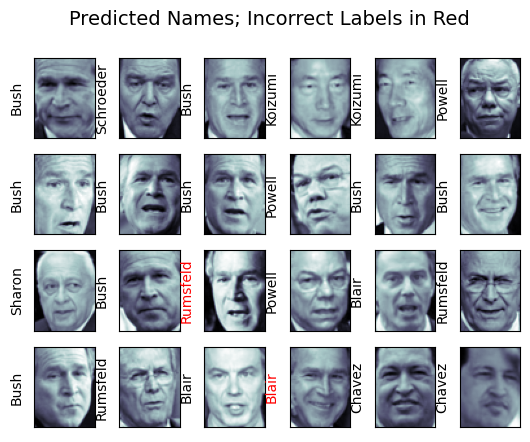

In [9]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

It will create a grid of face images from the test data. For each image, the predicted name will be displayed as the y-axis label. If the prediction is incorrect, the label will be displayed in red, making it easy to identify misclassifications visually.

In [10]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



In this code, we are using scikit-learn's classification_report function to generate a text report showing the main classification metrics for the face recognition model's performance on the test data. When the code is running, it will print a detailed classification report showing the model's performance for each class (person) in the faces.target_names list. This report provides valuable insights into how well the model performs for each individual person in the test dataset.

Text(113.92222222222219, 0.5, 'predicted label')

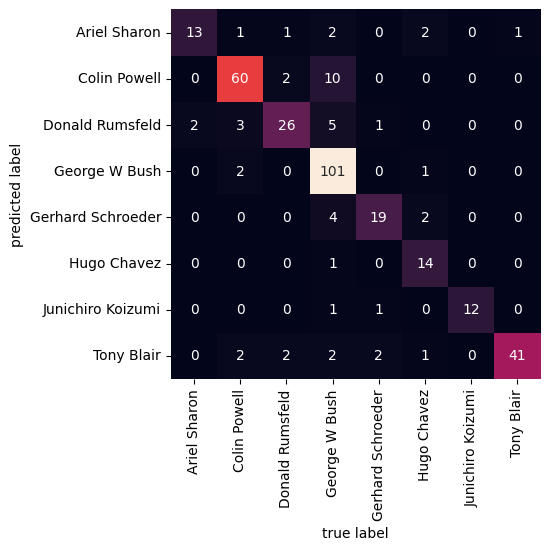

In [13]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

When the code is running, it will generate a heatmap where we can visually assess how well our classification model is performing for each class. The values in the cells indicate the number of samples that were classified correctly (diagonal elements) and incorrectly (off-diagonal elements) for each class. Seaborn's heatmap provides a clear and concise way to interpret the confusion matrix.